## Practical 6

**Aim:**: Implement Multi Layer Perceptron for the classification of handwritten digits (MNIST Dataset)

In [ ]:
!pip install numpy matplotlib tensorflow

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


d:\subhashish\msc-cookbook\Sem-2\ML\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8654 - loss: 0.4683 - val_accuracy: 0.9624 - val_loss: 0.1251
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9667 - loss: 0.1071 - val_accuracy: 0.9703 - val_loss: 0.0966
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9791 - loss: 0.0677 - val_accuracy: 0.9684 - val_loss: 0.0965
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9838 - loss: 0.0493 - val_accuracy: 0.9703 - val_loss: 0.0992
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9873 - loss: 0.0397 - val_accuracy: 0.9698 - val_loss: 0.1150
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.9745 - val_loss: 0.0946
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9930 - loss: 0.0225 - val_accuracy: 0.9695 - val_loss: 0.1159
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9934 - loss: 0

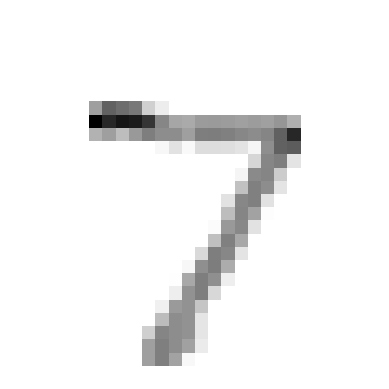

Sample 1 — Predicted: 2, True: 2


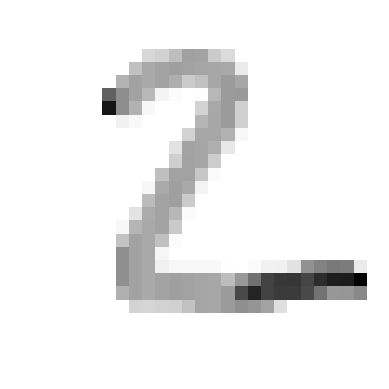

Sample 2 — Predicted: 1, True: 1


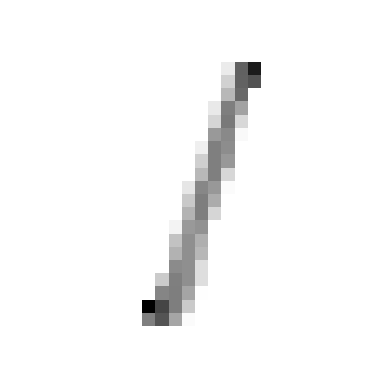

Sample 3 — Predicted: 0, True: 0


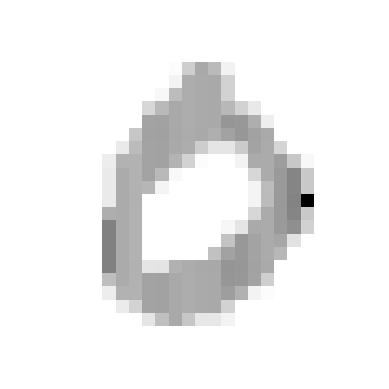

Sample 4 — Predicted: 4, True: 4


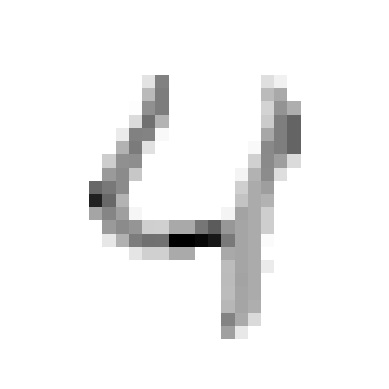

Sample 5 — Predicted: 1, True: 1


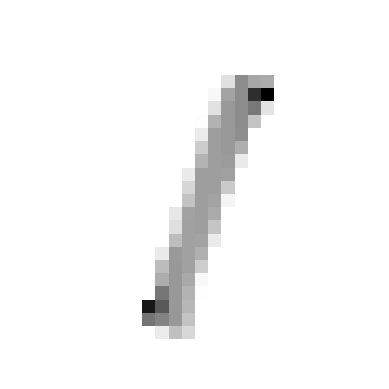

Sample 6 — Predicted: 4, True: 4


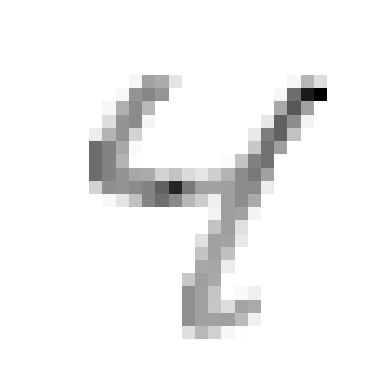

Sample 7 — Predicted: 9, True: 9


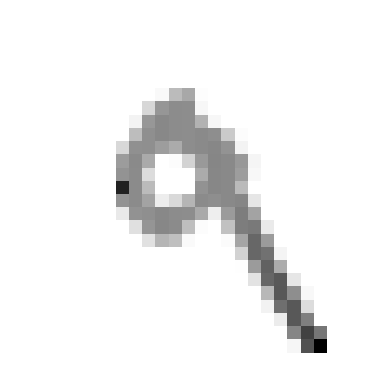

Sample 8 — Predicted: 5, True: 5


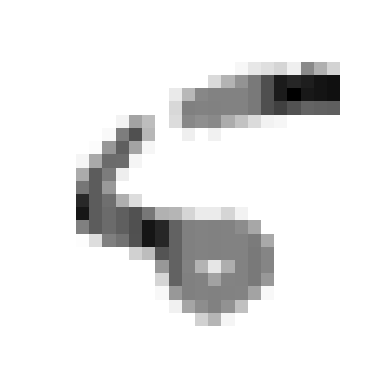

Sample 9 — Predicted: 9, True: 9


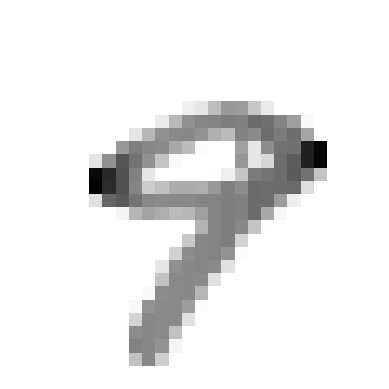

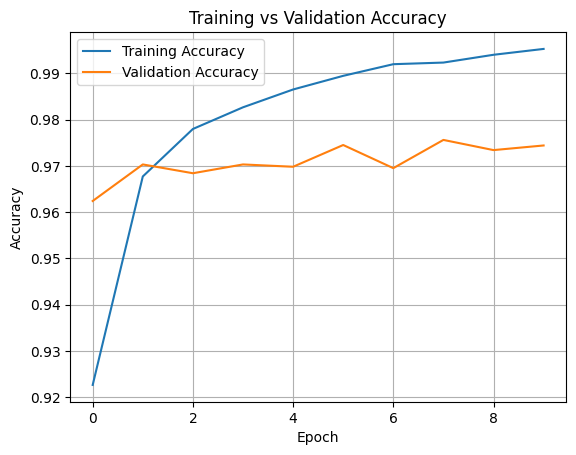

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test  = tf.keras.utils.normalize(x_test,  axis=1)

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),   # 128 neurons
    tf.keras.layers.Dense(128, activation='relu'),   # 128 neurons
    tf.keras.layers.Dense(10,  activation='softmax') # 10 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model parameters
EPOCHS     = 10
BATCH_SIZE = 32

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(x_test, y_test)
)

# Evaluate the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {val_loss:.4f}    Test Accuracy: {val_acc:.4f}")

# Save and reload the model
model.save('mnist.keras')
new_model = tf.keras.models.load_model('mnist.keras')


# Make and display predictions on the first 10 test samples
predictions = new_model.predict(x_test)
for i in range(10):
    pred_label = np.argmax(predictions[i])
    print(f"Sample {i} — Predicted: {pred_label}, True: {y_test[i]}")
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.axis('off')
    plt.show()

# Plot training & validation accuracy over epochs
plt.plot(history.history['accuracy'],    label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()